In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [3]:
filepath = "F:\Computer Programming\Python-dev\OilProduction.csv"
df = pd.read_csv(filepath)

In [4]:
df.head(15)

,API,Unnamed: 1,Apr-83,May-83,Jun-83,Jul-83,Aug-83,Sep-83,Oct-83,Nov-83,...,19-Oct,19-Nov,19-Dec,20-Jan,20-Feb,20-Mar,20-Apr,20-May,20-Jun,20-Jul
0,NaN,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INTL.53-1-WORL-TBPD.M,Total petroleum and other liquids (Mb/d),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101267.100,101951.701,101674.673,101344.349,100211.030,100473.928,100324.314,88570.789,88595.238,90173.271
3,INTL.55-1-WORL-TBPD.M,"Crude oil, NGPL, and other liquids (Mb/d)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98669.923,99237.550,98958.303,98631.366,97694.596,97976.558,98094.096,86281.128,86210.787,87695.804
4,INTL.57-1-WORL-TBPD.M,Crude oil including lease condensate (Mb/d),50958.936,52658.767,52868.746,54651.57,54498.585,54498.585,54891.545,55259.509,...,82602.770,83578.780,83583.530,83220.688,82393.732,82414.546,82877.130,71482.853,70427.486,71557.235
5,INTL.58-1-WORL-TBPD.M,NGPL (Mb/d),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11696.049,11674.553,11739.701,11814.703,11721.664,11990.360,11718.616,10959.816,11695.751,11832.562
6,INTL.59-1-WORL-TBPD.M,Other liquids (Mb/d),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4371.104,3984.217,3635.072,3595.975,3579.200,3571.652,3498.350,3838.459,4087.550,4306.007
7,INTL.56-1-WORL-TBPD.M,Refinery processing gain (Mb/d),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2597.177,2714.151,2716.370,2712.983,2516.434,2497.370,2230.218,2289.661,2384.451,2477.467
8,NaN,Consumption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,none,Refined petroleum products (Mb/d),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(columns = ["API", "Unnamed: 1"])

In [6]:
list_production = []
for column in df:
    columnSeriesObj = df[column]
    x = columnSeriesObj.iloc[2]
    if (type(x) != str and math.isnan(x)):
        added = columnSeriesObj.iloc[4]
    elif (type(x) != str):
        added = columnSeriesObj.iloc[2]
    list_production.append(added)
len(list_production)

448

In [7]:
filepath = "F:\Computer Programming\Python-dev\Crude Oil WTI Futures Historical Data.csv"
df_price = pd.read_csv(filepath)

In [8]:
list_price = []
list_price = list(df_price.iloc[0:448, 1])
df_x = np.array(list_production)
df_y = np.array(list_price)
df_x = df_x.reshape(-1, 1)
df_y = df_y.reshape(-1, 1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 0)

In [10]:
regressor = LinearRegression()

In [11]:
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
print(regressor.coef_)

[[-0.0013707]]


In [13]:
print(regressor.intercept_)

[148.88005122]


In [14]:
predicted = regressor.predict(x_test)

In [15]:
#print(predicted)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predicted))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Squared Error:", math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 15.297519546620595
Mean Squared Error: 380.014072595659
Root Mean Squared Error: 19.493949640738766


In [16]:
regressor.score(x_train, y_train)

0.4995336436354123

Text(0, 0.5, 'Crude Oil Price in Dollars')

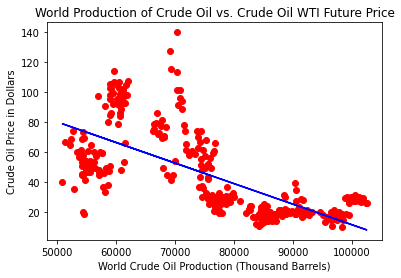

In [18]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, regressor.predict(x_train), color = "blue")
plt.title("World Production of Crude Oil vs. Crude Oil WTI Future Price")
plt.xlabel("World Crude Oil Production (Thousand Barrels)")
plt.ylabel("Crude Oil Price in Dollars")